# Tree-based Algorithms:
---
* Decision Tree
* Random Forest
* XGBoost

Import dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

Load Data

In [2]:
# Load the csv files
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Train the Models (Default parameters)

In [3]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print('------- Decision Tree (Default) Results -------')
print(classification_report(y_test, dt_pred))
print('Decision Tree: ', accuracy_score(y_test, dt_pred))

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print('------- Random Forest (Default) Results -------')
print(classification_report(y_test, rf_pred))
print('Random Forest Accuracy: ', accuracy_score(y_test, rf_pred))

# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print('------- XGBoost (Default) Results -------')
print(classification_report(y_test, xgb_pred))
print('XGBoost Accuracy: ',accuracy_score(y_test, xgb_pred))

------- Decision Tree (Default) Results -------
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     44147
           1       0.52      0.57      0.54      6253

    accuracy                           0.88     50400
   macro avg       0.73      0.75      0.74     50400
weighted avg       0.89      0.88      0.88     50400

Decision Tree:  0.8807936507936508


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


------- Random Forest (Default) Results -------
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     44147
           1       0.60      0.54      0.57      6253

    accuracy                           0.90     50400
   macro avg       0.77      0.74      0.76     50400
weighted avg       0.89      0.90      0.90     50400

Random Forest Accuracy:  0.8986904761904762
------- XGBoost (Default) Results -------
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     44147
           1       0.64      0.25      0.35      6253

    accuracy                           0.89     50400
   macro avg       0.77      0.61      0.65     50400
weighted avg       0.87      0.89      0.87     50400

XGBoost Accuracy:  0.8889880952380952


### Trying SMOTE due to Imbalanced dataset.

In [4]:
sm = SMOTE(random_state=0)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Train
dt.fit(X_resampled, y_resampled)
rf.fit(X_resampled, y_resampled)
xgb.fit(X_resampled, y_resampled)

# Predict
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)

# Print results
print('------- Decision Tree (SMOTE) Results -------')
print(classification_report(y_test, dt_pred))
print('-------Random Forest (SMOTE) Results -------')
print(classification_report(y_test, rf_pred))
print('-------XGBoost (SMOTE) Results -------')
print(classification_report(y_test, xgb_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


------- Decision Tree (SMOTE) Results -------
              precision    recall  f1-score   support

           0       0.97      0.88      0.92     44147
           1       0.49      0.83      0.61      6253

    accuracy                           0.87     50400
   macro avg       0.73      0.85      0.77     50400
weighted avg       0.91      0.87      0.88     50400

-------Random Forest (SMOTE) Results -------
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     44147
           1       0.55      0.77      0.64      6253

    accuracy                           0.89     50400
   macro avg       0.76      0.84      0.79     50400
weighted avg       0.91      0.89      0.90     50400

-------XGBoost (SMOTE) Results -------
              precision    recall  f1-score   support

           0       0.96      0.88      0.92     44147
           1       0.48      0.75      0.58      6253

    accuracy                           0.87     5040

After using SMOTE, the recall scores for the minority class improved in all 3 models:
* Decision Tree: 0.57 -> 0.83
* Random Forest: 0.54 -> 0.77
* XGBoost: 0.25 -> 0.75

While there were slight decreases in accuracy and precision, recall was more important because the goal was to identify all positive instances.

### Hyperparameter Tuning

#### First, find the best hyperparameters for each model.

Decision Tree

In [ ]:
treeParams = {
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini","entropy"]
}
gs = GridSearchCV(DecisionTreeClassifier(), treeParams, cv=5)
gs.fit(X_train, y_train)
print(gs.best_params_)

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}


Random Forest

In [ ]:
randomForestParams = {
    "max_depth": [None, 10, 20],
    "max_features": ["sqrt","log2"],
    "min_samples_leaf": [1,2,4]
}
rs = RandomizedSearchCV(RandomForestClassifier(), randomForestParams, n_iter=20, cv=3)
rs.fit(X_train, y_train)
print(rs.best_params_)

C:\Users\skuma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\skuma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\skuma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

{'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


XGBoost

In [ ]:
#model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgbParams = {
    "max_depth": [3,6,9],
    "learning_rate": [0.01,0.1,0.2],
    "subsample": [0.6,0.8,1.0],
    "colsample_bytree": [0.6,0.8,1.0],
    "gamma": [0,1,5]
}
gs = GridSearchCV(XGBClassifier(), xgbParams, cv=3)
gs.fit(X_train, y_train)
print(gs.best_params_)

C:\Users\skuma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'colsample_bytree': 1.0, 'gamma': 1, 'learning_rate': 0.2, 'max_depth': 9, 'subsample': 0.6}


#### Train the models with SMOTE and best hyperparameters.

In [5]:
# Initialize models with the best hyperparametrs
dtBest = DecisionTreeClassifier(max_depth=20, min_samples_split=10, min_samples_leaf=4, criterion='gini')
rfBest = RandomForestClassifier(max_depth=None, max_features='log2', min_samples_leaf=1)
xgbBest = XGBClassifier(max_depth=9, learning_rate=0.2, subsample=0.6, colsample_bytree=1.0, gamma=1)

# Train
dtBest.fit(X_resampled, y_resampled)
rfBest.fit(X_resampled, y_resampled)
xgbBest.fit(X_resampled, y_resampled)

# Predict
dtBest_pred = dt.predict(X_test)
rfBest_pred = rf.predict(X_test)
xgbBest_pred = xgb.predict(X_test)

# Print results
print('------- Decision Tree (Best) Results -------')
print(classification_report(y_test, dtBest_pred))
print('-------Random Forest (Best) Results -------')
print(classification_report(y_test, rfBest_pred))
print('-------XGBoost (Best) Results -------')
print(classification_report(y_test, xgbBest_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


------- Decision Tree (Best) Results -------
              precision    recall  f1-score   support

           0       0.97      0.88      0.92     44147
           1       0.49      0.83      0.61      6253

    accuracy                           0.87     50400
   macro avg       0.73      0.85      0.77     50400
weighted avg       0.91      0.87      0.88     50400

-------Random Forest (Best) Results -------
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     44147
           1       0.55      0.77      0.64      6253

    accuracy                           0.89     50400
   macro avg       0.76      0.84      0.79     50400
weighted avg       0.91      0.89      0.90     50400

-------XGBoost (Best) Results -------
              precision    recall  f1-score   support

           0       0.96      0.88      0.92     44147
           1       0.48      0.75      0.58      6253

    accuracy                           0.87     50400
 

### Plots

In [6]:
models = {'Decision Tree': dtBest, 'Random Forest': rfBest, 'XGBoost': xgbBest}

ROC-AUC Curve

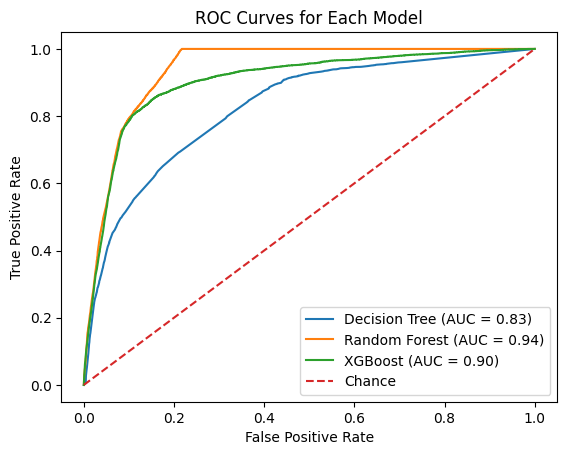

In [7]:
plt.figure()
for name, model in models.items():
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], '--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Model')
plt.legend(loc='lower right')
plt.show()

Precision-Recall Curve

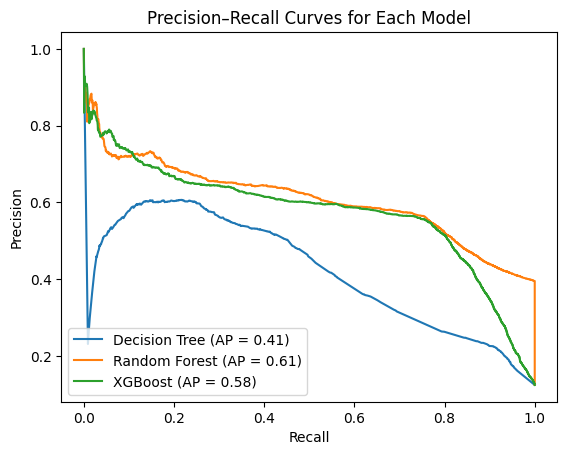

In [8]:
plt.figure()
for name, model in models.items():
    y_score = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    ap = average_precision_score(y_test, y_score)
    plt.plot(recall, precision, label=f'{name} (AP = {ap:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curves for Each Model')
plt.legend(loc='lower left')
plt.show()

Confusion Matrices

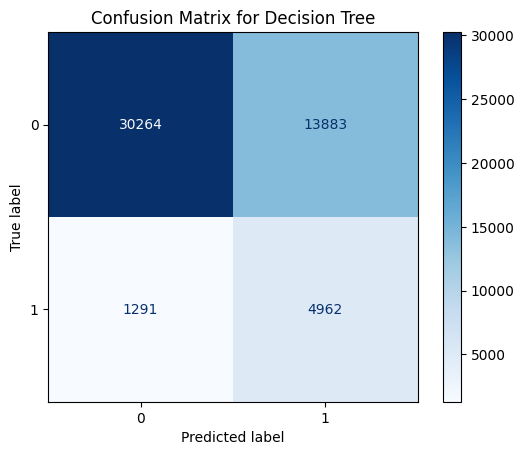

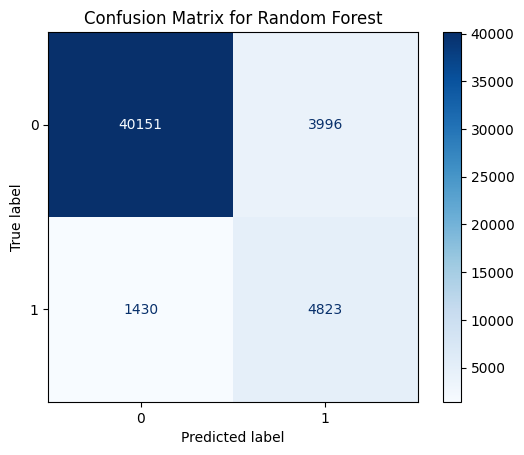

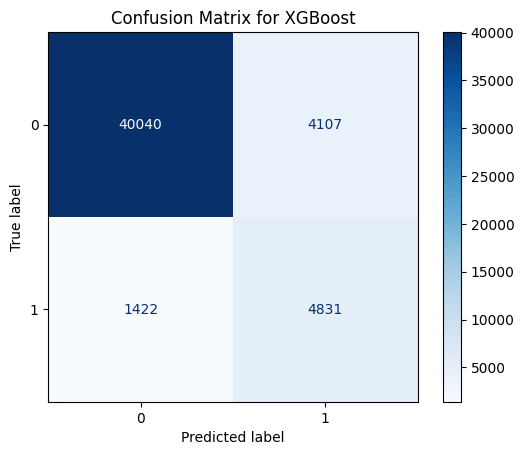

In [9]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

From the plots above, Random Forest performed the best, as it had the least amount of false predictions and Decision Tree was the worst. XGBoost was similar to Random Forest.

Even though we achieved the highest recall score for the minority class in Decision Tree.

### Determine the most important features.

In [20]:
def topFeatures(importances, featureNames):
    df = pd.DataFrame({
        'feature': featureNames,
        'importance': importances
    }).sort_values('importance', ascending=False)

    return df.head(10)

features = pd.read_csv('X_train.csv')
featureNames = features.columns.tolist()

Decision Tree

In [21]:
dtImportance = dtBest.feature_importances_
print("Top features according to Decision Tree:")
print(topFeatures(dtImportance, featureNames))

Top features according to Decision Tree:
              feature  importance
0              Income    0.168978
6          Profession    0.158580
7                CITY    0.147101
8               STATE    0.110755
2          Experience    0.109907
1                 Age    0.105653
9     CURRENT_JOB_YRS    0.091519
10  CURRENT_HOUSE_YRS    0.065082
3      Married/Single    0.018196
5       Car_Ownership    0.015090


Random Forest

In [22]:
rfImportance = rfBest.feature_importances_
print("Top features according to Random Forest:")
print(topFeatures(rfImportance, featureNames))

Top features according to Random Forest:
              feature  importance
0              Income    0.162227
7                CITY    0.144622
1                 Age    0.139781
6          Profession    0.137563
8               STATE    0.108074
2          Experience    0.102707
9     CURRENT_JOB_YRS    0.096001
10  CURRENT_HOUSE_YRS    0.070959
5       Car_Ownership    0.015350
3      Married/Single    0.012486


XGBoost

In [23]:
booster = xgbBest.get_booster()
xgbScores = booster.get_score(importance_type="gain")
xgbImportance = [xgbScores.get(f"f{i}", 0.0) for i in range(len(featureNames))]
print("Top features according to XGBoost:")
print(topFeatures(xgbImportance, featureNames))

Top features according to XGBoost:
              feature  importance
9     CURRENT_JOB_YRS   44.701897
2          Experience   38.784565
10  CURRENT_HOUSE_YRS   38.250645
0              Income   30.502213
8               STATE   30.246174
1                 Age   30.031967
6          Profession   29.944979
7                CITY   29.442259
3      Married/Single   26.482937
5       Car_Ownership   26.332443


The models weren't too consistent about determining the most significant features. For Decision Tree and Random Forest: income was the most significant. For XGBoost, CURRENT_JOB_YEARS was the most significant. Location was more important for Decision Tree (CITY) and Random Forest (CITY and STATE), while XGBoost focused more on Experience, CURRENT_JOB_YRS, and CURRENT_HOUSE_YRS. It's best to compare the results across several models to get a better idea about which features are the best predictors.